## Business Problem
- The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected

#### Goal is to create a classification model than predict if they mouse will still be infected with the virus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df['Virus Present'].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

### EDA

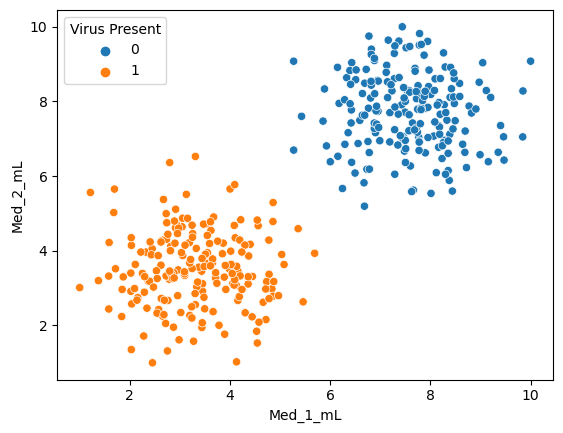

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
plt.show()

#### Data Cleaning

In [7]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

#### Data Wrangling

In [8]:
# No encoding required

### X& y

In [11]:
X=df.drop('Virus Present',axis=1)
y=df['Virus Present']

#### Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                 random_state=9)

## Decision Tree
#### with default parameters

In [14]:
#Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default_model=DecisionTreeClassifier()
dt_default_model.fit(X_train,y_train)


#Prediction and Eval on Train
ypred_train = dt_default_model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))


#CV Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(dt_default_model,X_train,y_train,cv=5).mean())

#Predict and Eval on Test Data
ypred_test = dt_default_model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 1.0
CV Score: 0.996875
Test Accuracy: 0.975


## Plotting or Visualize of Tree

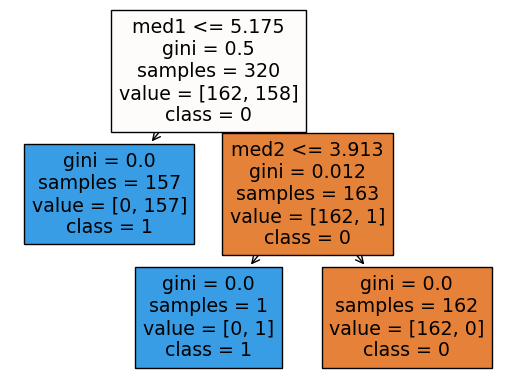

In [24]:
from sklearn.tree import plot_tree
plot_tree(dt_default_model,filled=True,    #filled means colours
         feature_names=['med1','med2'],class_names=['0','1'])
plt.show()

In [22]:
dt_default_model.predict([[2.6,3.7]])

C:\Users\Mitta Aasish Kumar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [23]:
dt_default_model.predict([[6.9,5.9]])

C:\Users\Mitta Aasish Kumar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)